# COGS 108 - Determining Factors That Predict Dating Compatibility

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [__X__] YES - make available
* [  ] NO - keep private

# Overview

What are the factors that are the most important in determining a match between a pair in their 20s in early stages? We have found that, in successfully matched pairs, there are attributes that seem to have some significance, and is different from pairs who did not end up matching. However, when we tried to use these attributes to see if we can predict matches, we were mostly unsuccessful, indicating that while pairs who matched may have certain characteristics, those same characteristics cannot accurately predict whether a pair will match or not.

# Names

- Avantika Goyal
- Akhilan Gurumoorthy
- Derek Ma
- Weston Yang
- Yu Huang

<a id='research_question'></a>
# Research Question

What factors are most important in determining a match/compatibility between two individuals in their 20s in the early stages of meeting?

# Background and Prior Work


As people enter early adulthood in their 20s, many seek out romantic relationships and hope to find a significant other to journey with them through life. In romantic relationships, compatibility is one of the most essential factors—but what determines compatibility? For two individuals in their 20s, determining compatibility is a complex challenge: factors such as age, shared interests, preference in race, humor, ambition—to name a few, are all contributors that determine compatibility for two people in a relationship, and the overwhelming amount of factors involved is what makes determining compatibility so complex.

This research project aims to explore some of these factors in determining compatibility by looking at how well different factors predict matches in partners by using a variety of different statistical and data analysis techniques on a speed dating dataset. This dataset contains data for age, race, interests, and self-ratings for two people who went on a speed date, as well as information on what both people thought of the date. The overall idea is to see whether or not certain factors about these potential pairings are able to correlate or predict whether the pair ended up in a match or not.

In a 2019 Pew Research Center survey of American adults, responses show that a difference in religion, race, ethnicity, and income are generally not major dealbreakers in dating and relationships. In fact, 77%+ responders said they were open to dating (or have already dated) someone who differs from them on these characteristics [1]. 

In another study conducted by Columbia professors Ray Fisman and Sheena Iyengar, results indicated differences between the genders regarding what they prioritize when dating. They found that “women put greater weight on the intelligence and the race of partner, while men respond more to physical attractiveness. Moreover, men do not value women’s intelligence or ambition when it exceeds their own” [2]. This seems somewhat consistent with traditional gender stereotypes and suggests that when we carry out our project, we should segment the data by gender to achieve more meaningful results. 

[1]: Amanda Borroso. (2020, August 21). Key takeaways on Americans’ views of and experiences with dating and relationships. Pew Research Center. https://www.pewresearch.org/fact-tank/2020/08/20/key-takeaways-on-americans-views-of-and-experiences-with-dating-and-relationships/

[2]: Fisman, R., Iyengar, S. S., Kamenica, E., & Simonson, I. (2006). Gender differences in mate selection: Evidence from a speed dating experiment. The Quarterly Journal of Economics, 121(2), 673-697. https://doi.org/10.1162/qjec.2006.121.2.673

# Hypothesis

Our hypothesis is that within the 20-30s age group, the main factors contributing to a match after a speed date lasting a couple minutes between two people are [‘attractiveness’ and ‘shared interests’]. We believe that this is the case since the first impression between 2 people is very important, and in the speed date, there is only a few minutes to talk, so attractiveness and the topics both people find interesting during the short time will greatly impact their impression of each other. Many other attributes such as sincerity, intelligence, etc cannot properly be judged with just a few minutes of talking, and factors such as age and race likely matter less for younger people. 

# Data

Dataset Name: Speed Dating

Link to Dataset: https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating

Number of Observations: 8378

This dataset has over 100 columns each representing an attribute that the speed daters found important, and each row represents a single speed dater’s data, which does match with our ideal pretty well. Our dataset has over 8000 observations on a speed date participant’s opinion towards their partner and what they believe were important after a date that were made over the years 2002-2004, for people who were aged 18-55, though the majority were in the 20-30 year old range. It is a little old and has some noise that has to be trimmed out, but it should work. The data was collected through a questionnaire given after a 4 minute date, where they are asked whether they would date the other person again, how they would rate their date across 6 attributes, and also other data collected from the participant like age, habits, and lifestyle. This should be a decent way of collecting and storing, as the survey right after the date should reflect their impression of the other person well, and it is stored in a database too.

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('speeddating.csv')
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


# Data Cleaning

In [3]:
# Finding null values
df.isnull().sum()

has_null                0
wave                    0
gender                  0
age                    95
age_o                 104
                     ... 
d_guess_prob_liked      0
met                   375
decision                0
decision_o              0
match                   0
Length: 123, dtype: int64

In [4]:
# Clean the column that has character "b" in front of string value

def remove_char_b(col):
    return col.replace("b",'')

temp_df = df.select_dtypes(include = ['object'])

for col in temp_df.columns:
    df[col] = df[col].apply(lambda x: remove_char_b(x))

df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,'',1.0,'female',21.0,27.0,6.0,'[4-6]','Asian/Pacific Islander/Asian-American','European/Caucasian-American','0',...,'[0-3]','[3-5]',7.0,6.0,'[6-8]','[5-6]',0.0,'1','0','0'
1,'',1.0,'female',21.0,22.0,1.0,'[0-1]','Asian/Pacific Islander/Asian-American','European/Caucasian-American','0',...,'[0-3]','[3-5]',7.0,5.0,'[6-8]','[5-6]',1.0,'1','0','0'
2,'',1.0,'female',21.0,22.0,1.0,'[0-1]','Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American','1',...,'[0-3]','[3-5]',7.0,NaN,'[6-8]','[0-4]',1.0,'1','1','1'
3,'',1.0,'female',21.0,23.0,2.0,'[2-3]','Asian/Pacific Islander/Asian-American','European/Caucasian-American','0',...,'[0-3]','[3-5]',7.0,6.0,'[6-8]','[5-6]',0.0,'1','1','1'
4,'',1.0,'female',21.0,24.0,3.0,'[2-3]','Asian/Pacific Islander/Asian-American','Latino/Hispanic American','0',...,'[0-3]','[3-5]',6.0,6.0,'[6-8]','[5-6]',0.0,'1','1','1'


In [5]:
# Clean the column that has extra quotation marks

def remove_quote(col):
    return col.replace("'",'')

temp_df = df.select_dtypes(include = ['object'])

for col in temp_df.columns:
    df[col] = df[col].apply(lambda x: remove_quote(x))

df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,,1.0,female,21.0,27.0,6.0,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,...,[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1
3,,1.0,female,21.0,23.0,2.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1,1
4,,1.0,female,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,...,[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0,1,1,1


In [6]:
# drop has_null col
df.drop(['has_null'], axis = 1, inplace= True)

In [7]:
# Find columns' missing-value percentage
df.isnull().mean().sort_values(ascending=False)

expected_num_interested_in_me    0.785152
expected_num_matches             0.140010
shared_interests_o               0.128432
shared_interests_partner         0.127357
ambitous_o                       0.086178
                                   ...   
d_funny_important                0.000000
d_intellicence_important         0.000000
d_sincere_important              0.000000
d_attractive_important           0.000000
match                            0.000000
Length: 122, dtype: float64

In [8]:
# Drop columns that have more than 50% missing cells
df.drop('expected_num_interested_in_me', axis=1, inplace=True)

In [9]:
# Also dropping expected_num_matches here, because it's not tightly related to our research question.
# we are hoping to find the correlation in between characteristics from the actual result collected,
# instead of the expectation of the result.

df.drop('expected_num_matches', axis=1, inplace=True)

In [10]:
pd.set_option('display.max_rows', None)
df.isnull().sum().sort_values(ascending=False)

shared_interests_o                 1076
shared_interests_partner           1067
ambitous_o                          722
ambition_partner                    712
met                                 375
funny_o                             360
funny_partner                       350
guess_prob_liked                    309
intelligence_o                      306
intelligence_partner                296
sinsere_o                           287
sincere_partner                     277
like                                240
attractive_o                        212
attractive_partner                  202
interests_correlate                 158
pref_o_shared_interests             129
shared_interests_important          121
pref_o_ambitious                    107
sincere                             105
intelligence                        105
funny                               105
ambition                            105
attractive                          105
age_o                               104


In [11]:
# Find all string/object cols
df_string_cols = df.select_dtypes(include='object').columns

# Find all numeric cols
df_numeric_cols = df.select_dtypes(include='number').columns

In [12]:
df.shape

(8378, 120)

In [13]:
# Dataset only contains string/object and numeric values
len(df_string_cols) + len(df_numeric_cols) == df.shape[1]

True

In [14]:
# Deal with string cols' missing value, and find out that string cols have no missing value
df[df_string_cols].isnull().sum().any()

False

In [15]:
# Deal with numeric cols' missing value
df[df_numeric_cols].isnull().sum().sort_values(ascending=False)

shared_interests_o               1076
shared_interests_partner         1067
ambitous_o                        722
ambition_partner                  712
met                               375
funny_o                           360
funny_partner                     350
guess_prob_liked                  309
intelligence_o                    306
intelligence_partner              296
sinsere_o                         287
sincere_partner                   277
like                              240
attractive_o                      212
attractive_partner                202
interests_correlate               158
pref_o_shared_interests           129
shared_interests_important        121
pref_o_ambitious                  107
funny                             105
intelligence                      105
sincere                           105
attractive                        105
ambition                          105
age_o                             104
expected_happy_with_sd_people     101
ambtition_im

In [16]:
# Find numeric cols that have binary-data ("<=3" because it may contain np.nan value)

binary_cols = [col for col in df_numeric_cols if df[col].nunique() <= 3]
binary_cols

[]

In [17]:
# Convert 'match' column into binary data
df['match'] = df['match'].apply(pd.to_numeric)

In [18]:
# It's surprising that the 'met' column is not in binary_cols, thus look into it
df['met'].unique()

array([ 0.,  1., nan,  3.,  5.,  7.,  8.,  6.])

In [19]:
# Decide to drop those rows as they are meaningless data
df[(df['met'] != 0) & (df['met'] != 1)].shape

(383, 120)

In [20]:
df = df[(df['met'] == 0) | (df['met'] == 1)]

In [21]:
# Then for the rest of numeric columns, we decide to do mean-imputation
df[df_numeric_cols] = df[df_numeric_cols].fillna(df[df_numeric_cols].mean())

In [22]:
# check if there are any NaN values in our dataset
if df.isnull().any().any():
    print("There are np.nan values in our dataset")
else:
    print("There are no np.nan values in our dataset")

There are no np.nan values in our dataset


In [23]:
df.shape

(7995, 120)

### Simplifying Our Dataset

After taking a closer look at the columns, we realized that many of our columns are redundant in the context of our research question and hypothesis. To reduce clutter in our dataset, cutting out any redundant and unuseful columns would be better for the sake of simplicity. Upon agreement, we decided to truncate columns given and only keep the following 21 columns in our dataframe, as we believe those are the features that matters the most to our target question.

In [24]:
columns = ["gender", "age", "age_o", "d_age", "race", "race_o", "samerace", "field", "attractive", "sincere",
           "intelligence", "funny", "ambition", "attractive_partner", "sincere_partner", "intelligence_partner",
           "funny_partner", "ambition_partner", "interests_correlate", "match", "met"]

In [25]:
len(columns)

21

In [26]:
# reducing our dataframe to the relavant columns

df = df[columns]
df.shape

(7995, 21)

# Data Analysis & Results (EDA)

In [27]:
pd.set_option('display.max_rows', 50)
df

,gender,age,age_o,d_age,race,race_o,samerace,field,attractive,sincere,...,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,interests_correlate,match,met
0,female,21.0,27.0,6.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,Law,6.0,8.0,...,8.0,7.0,6.0,9.0,7.0,7.0,6.00000,0.14,0,0.0
1,female,21.0,22.0,1.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,Law,6.0,8.0,...,8.0,7.0,7.0,8.0,7.0,8.0,5.00000,0.54,0,1.0
2,female,21.0,22.0,1.0,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,Law,6.0,8.0,...,8.0,7.0,5.0,8.0,9.0,8.0,5.00000,0.16,1,1.0
3,female,21.0,23.0,2.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,Law,6.0,8.0,...,8.0,7.0,7.0,6.0,8.0,7.0,6.00000,0.61,1,0.0
4,female,21.0,24.0,3.0,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,Law,6.0,8.0,...,8.0,7.0,5.0,6.0,7.0,7.0,6.00000,0.21,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,male,25.0,26.0,1.0,European/Caucasian-American,Latino/Hispanic American,0,Climate Dynamics,8.0,7.0,...,7.0,7.0,3.0,5.0,5.0,5.0,6.77639,0.64,0,0.0
8374,male,25.0,24.0,1.0,European/Caucasian-American,Other,0,Climate Dynamics,8.0,7.0,...,7.0,7.0,4.0,6.0,8.0,4.0,4.00000,0.71,0,0.0
8375,male,25.0,29.0,4.0,European/Caucasian-American,Latino/Hispanic American,0,Climate Dynamics,8.0,7.0,...,7.0,7.0,4.0,7.0,8.0,8.0,8.00000,-0.46,0,0.0
8376,male,25.0,22.0,3.0,European/Caucasian-American,Asian/Pacific Islander/Asian-American,0,Climate Dynamics,8.0,7.0,...,7.0,7.0,4.0,6.0,5.0,4.0,6.77639,0.62,0,0.0


### Analyze Age Distribution of Samples

(array([ 357., 3130., 3183.,  857.,  401.,   41.,   20.,    0.,    0.,
           6.]),
 array([18. , 21.7, 25.4, 29.1, 32.8, 36.5, 40.2, 43.9, 47.6, 51.3, 55. ]),
 <BarContainer object of 10 artists>)

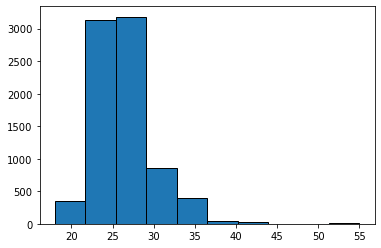

In [28]:
plt.hist(df['age'], align='mid', edgecolor='black')

From which we can see that majority of samples are within age 20-30. And we want to view stats of age across different genders. However, there are some outliers making this a right skewed unimodal data shape.

We will clean up the data so only ages 20-30 are shown as per the hypothesis:

(array([  53.,  278.,  629.,  867.,  821.,  813.,  895., 1010.,  711.,
        1100.]),
 array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.]),
 <BarContainer object of 10 artists>)

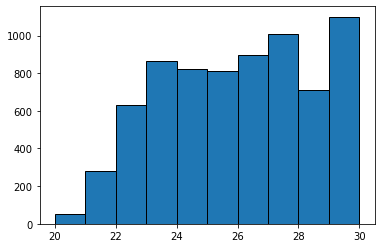

In [29]:
df_age_trimmed = df[(df['age'] >= 20) & (df['age'] <= 30)]
plt.hist(df_age_trimmed['age'], align='mid', edgecolor='black')

In [30]:
df_age_trimmed.pivot_table(values='age', index='gender', aggfunc=['mean', 'median'])

,mean,median
,age,age
gender,,
female,25.234173,25.0
male,25.930556,26.0


Based on the graph, it is a bimodal data graph that contains only ages from our hypothesis. It has a slight left skew now. However, we do see that the mean age of male and female paritcipants are different. We can further split the age data by gender, to see if gender has influence on how old someone is, and compare the distribution of the graphs.

/tmp/ipykernel_764/2570580947.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_male_age_trimmed = df_age_trimmed[df['gender'] == 'male']


(array([ 23., 104., 276., 377., 387., 371., 384., 591., 421., 671.]),
 array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.]),
 <BarContainer object of 10 artists>)

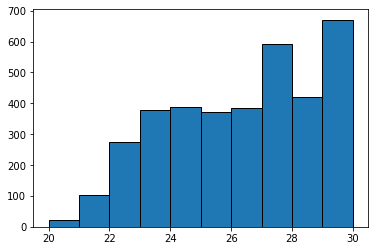

In [31]:
df_male_age_trimmed = df_age_trimmed[df['gender'] == 'male']
plt.hist(df_male_age_trimmed['age'], align='mid', edgecolor='black')

/tmp/ipykernel_764/3598825546.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_female_age_trimmed = df_age_trimmed[df['gender'] == 'female']


(array([ 30., 174., 353., 490., 434., 442., 511., 419., 290., 429.]),
 array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.]),
 <BarContainer object of 10 artists>)

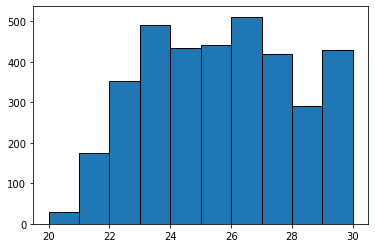

In [32]:
df_female_age_trimmed = df_age_trimmed[df['gender'] == 'female']
plt.hist(df_female_age_trimmed['age'], align='mid', edgecolor='black')

Both male and female graphs have a bimodal shape distribution. However, the male age seems more skewed left while female age is more centered. This shows in our dataset the age distribution across male and female have some differences to consider.

Both male and female graphs have a bimodal shape distribution. However, the male age seems more skewed left while female age is more centered. This shows in our dataset the age distribution across male and female have some differences to consider.

### Analyze Distribution of Pairs with Differences in Age

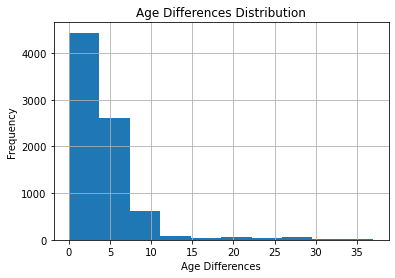

count    7995.000000
mean        4.139962
std         4.486942
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        37.000000
Name: d_age, dtype: float64

In [33]:
#create a histogram of ages
df['d_age'].hist(bins=10)
plt.xlabel('Age Differences')
plt.ylabel('Frequency')
plt.title('Age Differences Distribution')
plt.show()

df['d_age'].describe()

Here, we see that we have age differences ranging from 0 to 37, following a right skewed unimodal distribution with a median at 3 years in age gap, with an IQR of 4. Despite our relatively small IQR, we have a very wide range, so it is probably good to check for outliers at this point.

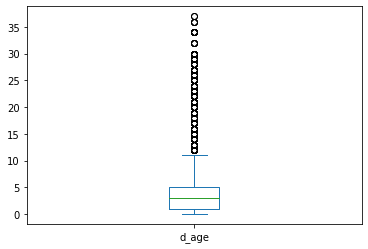

In [34]:
#look for outliers using boxplot
df['d_age'].plot(kind='box')
plt.show()

According to our boxplot, everything above the age difference of 11 is an outlier. Noted. 

### Analyze Distribution of Gender

In [35]:
## counts the number of genders
gender_counts = df['gender'].value_counts()
print(gender_counts)

male      4003
female    3992
Name: gender, dtype: int64


From here, we see we have a relatively uniform distribution of both males and females, and there doesn't seem to be anyone in this dataset that doesn't fall under one of those classifications.

### Analyze the Distribution of Work Fields

In [36]:
#implement the changes done in previous section
df = df_age_trimmed
df['field'].nunique()

233

In [37]:
df['field'].unique()

array(['Law', 'law', 'Economics', 'Masters in Pulic Administration',
       'Masters of Social Work&Education', 'Finance', 'Business',
       'political science', 'money', 'Operations Research',
       'TC [Health Ed]', 'Psychology', 'social work', 'Social Work',
       'Speech Language Pathology', 'Speech Languahe Pathology',
       'Educational Psychology', 'Applied Maths/Econs', 'Mathematics',
       'Statistics', 'Organizational Psychology',
       'Mechanical Engineering', 'Finanace', 'Finance&Economics',
       'Undergrad - GS', 'Mathematical Finance', 'Medicine', 'MBA', 'LAW',
       '?', 'psychology', 'German Literature',
       'Business & International Affairs', 'MFA Creative Writing',
       'Engineering', 'Electrical Engineering',
       'Operations Research [SEAS]', 'chemistry', 'Journalism',
       'Elementary/Childhood Education [MA]', 'Masters of Social Work',
       'Communications', 'Marketing', 'Chemistry',
       'International Educational Development',
       'Educ

In [38]:
# delete rows that have values being "?" in 'field' column
df = df[df['field'] != '?']

In [39]:
df['field'].value_counts()

Business                          462
Law                               423
MBA                               420
Social Work                       340
International Affairs             203
                                 ... 
Business [Finance & Marketing]      5
marine geophysics                   5
theory                              5
International Affairs/Business      5
SIPA - Energy                       2
Name: field, Length: 232, dtype: int64

An observation based on the field unique values is that there are hundreds of different fields, but we can simplify this by changing everything to lowercase, grouping them by broader categories, and also checking for outliers.

In [40]:
def standardize_field(string):
    string = string.lower()
    string = string.strip()
    if "law" in string:
        output = "Law"
    elif "business" in string: 
        output = "Business"
    elif "history" in string:
        output = "History"
    elif "social" in string:
        output = "Social Work"
    elif "mba" in string:
        output = "MBA"
    elif "international" in string:
        output = "International Affairs"
    elif "psychology" in string:
        output = "Psychology"
    elif "physic" in string:
        output = "Physics"
    elif "sociology" in string:
        output = "Sociology"
    elif "engineer" in string: 
        output = "Engineering"
    elif "journal" in string: 
        output = "Journalism"
    elif "econ" in string:
        output = "Economics"
    elif "finance" in string:
        output = "Finance"
    elif "research" in string:
        output = "Research"
    elif "chem" in string:
        output = "Chemistry"
    elif "poli" in string:
        output = "Political Science"
    elif "health" in string:
        output = "Health"
    elif "anthro" in string:
        output = "Anthropology"
    elif "math" in string:
        output = "Math" 
    elif "language" in string:
        output = "Language"
    elif "admin" in string:
        output = "Administration"
    elif "film" in string:
        output = "Film"
    elif "science" in string:
        output = "Science"
    elif "art" in string:
        output = "Art"
    elif "bio" in string:
        output = "Biology"
    elif "eco" in string:
        output = "Biology"
    
    elif "stat" in string:
        output = "Statisitcs"
    elif "med" in string:
        output = "Medicine"
    elif "lit" in string:
        output = "Literature"
    elif "ed" in string:
        output = "Education"
    else:
        output = "Other"
    return output

df['field'] = df['field'].apply(standardize_field)
df_female_age_trimmed['field'] = df_female_age_trimmed['field'].apply(standardize_field)
df_male_age_trimmed['field'] = df_male_age_trimmed['field'].apply(standardize_field)

/tmp/ipykernel_764/4192269946.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['field'] = df['field'].apply(standardize_field)
/tmp/ipykernel_764/4192269946.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female_age_trimmed['field'] = df_female_age_trimmed['field'].apply(standardize_field)
/tmp/ipykernel_764/4192269946.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [41]:
df['field'].value_counts().head(10)

Other                    1173
Business                  696
Law                       592
Engineering               535
MBA                       483
Social Work               450
International Affairs     446
Psychology                336
Education                 275
Biology                   197
Name: field, dtype: int64

It seems that we have lots of people doing Business, Law, Engineering, and MBA in our samples. Lots of the smaller fields were categorized as 'Other' for the sake of convenience as well. We can also try to see if gender will make a difference in the job/occupation of a person.

In [42]:
df_female_age_trimmed['field'].value_counts().head(10)

Other                    783
Social Work              450
Psychology               291
International Affairs    253
Education                248
Law                      233
Business                 129
Political Science        109
Medicine                 100
Biology                   99
Name: field, dtype: int64

In [43]:
df_male_age_trimmed['field'].value_counts().head(10)

Business                 567
Other                    445
Engineering              438
MBA                      431
Law                      359
International Affairs    193
Chemistry                146
Finance                  116
Math                     114
Biology                   98
Name: field, dtype: int64

Based on this data, we can see that gender correlated with the field a person works in, as the distribution of the most popular fields are different between genders. This potentially can have implications on our data. Also, since field is only qualitative data, we can't do things like distribition or central tendency. There is also the issue of grouping lots of people together in the "other" category when they are completely different majors, but something has to be done in order to account for typos or very specific majors with few people.

### Analyze Relationship Between Fields and Matches

In [44]:
meansArray = df.groupby('field')['match'].mean()
topTenFields = meansArray.sort_values(ascending=False)[:10]
topTenFields

field
Administration    0.351064
Medicine          0.281046
Literature        0.233766
History           0.228261
Journalism        0.220000
Law               0.219595
Biology           0.208122
Psychology        0.199405
Film              0.194175
Business          0.193966
Name: match, dtype: float64

This shows the ten fields with the highest match rates. This shows that many humanities fields tend to have higher success rates, but medicine and health-related fields also tends to have quite a success rate.

### Analyze Race Distribution and Affects of Race

In [45]:
df['race'].nunique()

5

In [46]:
df['race'].unique()

array(['Asian/Pacific Islander/Asian-American',
       'European/Caucasian-American', 'Other', 'Latino/Hispanic American',
       'Black/African American'], dtype=object)

Since there are only 5 categories of race given, we can just do analysis on how it affects data without much wrangling. Since race is also qualitative data, we can't run a mean or a distribution shape analysis on it.

In [47]:
df['race'].value_counts()

European/Caucasian-American              4007
Asian/Pacific Islander/Asian-American    1771
Latino/Hispanic American                  550
Other                                     454
Black/African American                    340
Name: race, dtype: int64

Based on this, we can see there is a majority of Caucasian people who are represented in the dataset, followed by Asian people. This data can potentially affect whether people will match, so we will see if gender has correlation with race. We can also drop the "?" data.

In [48]:
df = df[df['race'] != '?']
df_female_age_trimmed = df_female_age_trimmed[df_female_age_trimmed['race'] != '?']
df_male_age_trimmed = df_male_age_trimmed[df_male_age_trimmed['race'] != '?']

In [49]:
df_female_age_trimmed['race'].value_counts()

European/Caucasian-American              1888
Asian/Pacific Islander/Asian-American     933
Latino/Hispanic American                  316
Other                                     235
Black/African American                    165
Name: race, dtype: int64

In [50]:
df_male_age_trimmed['race'].value_counts()

European/Caucasian-American              2119
Asian/Pacific Islander/Asian-American     838
Latino/Hispanic American                  234
Other                                     219
Black/African American                    175
Name: race, dtype: int64

It looks like race is not correlated with gender, which means we will not have to do additional data wrangling to make our data support our hypothesis better.

### Analyze Relationship Between Pairs of Similar Race and Matches

In [51]:
# Looks at how many pairs were the same race
print(df['samerace'].value_counts())

0    4304
1    2818
Name: samerace, dtype: int64


We see that we have around 4000 pairs that were of different race, and 3000 pairs that were the same race. Let us just see if there's any initial association between match % and similar races.

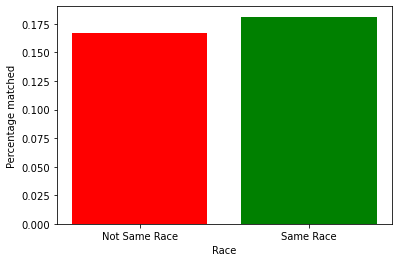

In [52]:
# grouped bar plot based on matching race

grouped = df.groupby('samerace')['match'].mean()

plt.bar(['Not Same Race', 'Same Race'], grouped.values, color=['red', 'green'])
plt.xlabel('Race')
plt.ylabel('Percentage matched')
plt.show()

We see there may be some association between matching and race. We don't know whether race is necessarily a good predictor of matches or not, but the fact remains that there seem to be some relationship between a pair being the same race and them matching, whether directly or through a confounding variable.

### Analyze Relationship Between Interest Correlation and Matches

In [53]:
intCorr = df['interests_correlate'].corr(df['match'])
intCorr

0.03322055238493937

The "intCorr" variable shows the correlation between the interest_correlate column and the match column. This value is incredibly low, thus implying that there is most likely not a strong connection between these two columns.

### Analyze Correlation of Attributes ('attractive', 'sincere', 'intelligence', 'funny', 'ambition') for Individuals

<AxesSubplot:>

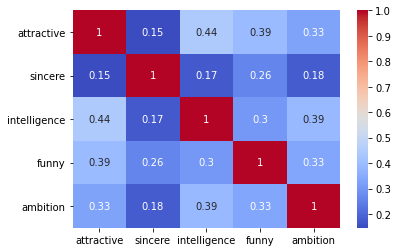

In [54]:
# 5 attribute columns that we want to analyze
attributes = ['attractive', 'sincere', 'intelligence', 'funny', 'ambition']

# find the correlation matrix
corr_matrix = df[attributes].corr()

# draw heatmap to show the correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

From which we can see that 'intelligence' and 'attractive' are comparatively high correlated when comparing to other attribute pairs.

### Visualize the Difference in Attribute Scores For Matched vs. Unmatched Pairs

Each individual scored themselves on these 5 attributes as well as their partner. We want to see if there's a relationship between those scores. Are individuals more likely to match with people who seem similar to them on these attributes?

In [55]:
# dataframe with attribute scores for the individual
attri_df = df[['attractive', 'sincere', 'intelligence', 'funny', 'ambition']]

# dataframe with attribute scores for the partner given by individual
attri_partner_df = df[['attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner']]
attri_partner_df.columns = ['attractive', 'sincere', 'intelligence', 'funny', 'ambition']

# dataframe with difference in attribute scores
attri_diff = attri_df.subtract(attri_partner_df)
attri_diff.columns = ['attractive_diff', 'sincere_diff', 'intelligence_diff', 'funny_diff', 'ambition_diff']

# include match column to group data my match
attri_diff['match'] = df['match']

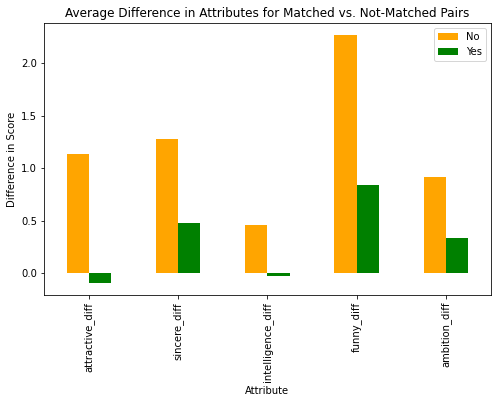

In [56]:
# grouped bar plot with average difference in attribute scores
mean_diff = attri_diff.groupby('match').mean()
mean_diff.transpose().plot(kind='bar', figsize=(8,5), title='Average Difference in Attributes for Matched vs. Not-Matched Pairs', 
                           ylabel='Difference in Score', xlabel='Attribute', color=['orange', 'green'])
plt.legend(['No', 'Yes'])
plt.show()


It appears that for all the attributes, the average difference is a lot lower for pairs that matched compared to those that did not. We can run a t-test to determine the significance. 

### T-Test to Determine Significance of Attribute Differences For Matched vs Unmatched Pairs

In [57]:
attributes = ['attractive_diff', 'sincere_diff', 'intelligence_diff', 'funny_diff', 'ambition_diff']

for a in attributes:
    match = attri_diff[attri_diff['match'] == 1][a]
    not_match = attri_diff[attri_diff['match'] == 0][a]
    t_val, p_val = stats.ttest_ind(match, not_match)
    print(t_val,p_val)
    if p_val < 0.05:
        print("There is a significant difference in "+a)
    else:
        print("There is not a significance difference in "+a)

-16.488942069866706 5.642901311418821e-60
There is a significant difference in attractive_diff
-12.401053771319726 5.910530960553161e-35
There is a significant difference in sincere_diff
-7.700273070739728 1.5414403899237064e-14
There is a significant difference in intelligence_diff
-21.762204865910007 1.0315996322260595e-101
There is a significant difference in funny_diff
-7.890145451226419 3.4705887048192993e-15
There is a significant difference in ambition_diff


Based on the results of these t-tests, we can conclude that there is a significant difference in the average difference of attribute scores between matched and not-matched pairs. In other words, most of the pairs that matched had a smaller difference in scores, and thus, similarity in all 5 attributes correlates with compatibility. 

### Check for Outliers in the Remaining Columns

Recall that we have trimmed the data so that our data only includes people between ages 20-30, so there won't be any outliers there.

Recall above we have also already checked for outliers for pairs with a difference in age group. For reference, here it is again:

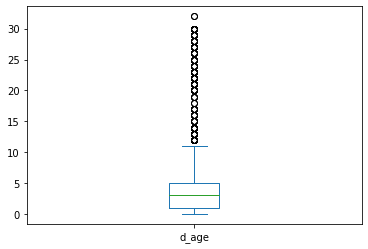

In [58]:
#look for outliers using boxplot
df['d_age'].plot(kind='box')
plt.show()

We have also ensured that our gender column does not have outliers.

In [59]:
df['gender'].value_counts()

male      3585
female    3537
Name: gender, dtype: int64

For the rest of the columns, we loop through them and for qualitative features, we check if any value occurs less than twice, and if so we consider those values as outliers and thus outliers exist in those columns; for quantitative features, we check if the z_score of any value is greater than 2 or less than -2, to determine if outliers exist.

In [60]:
from scipy.stats import zscore

In [61]:
def checkOutlierQualitative(series):
    for idx in series.index:
        if series[idx] < 2:
            return True
    return False

def checkOutlierQuantitative(series):
    z_scores = zscore(series)
    
    for idx in z_scores.index:
        if z_scores[idx] > 2 or z_scores[idx] < -2:
            return True
    return False

In [62]:
outlier_columns = []

for i in range(4, len(columns)):
    col = columns[i]
    
    if df[col].dtypes == 'O': # qualitative feature
        if checkOutlierQualitative(df[col].value_counts()):
            outlier_columns.append(col)
    else: # quantitative feature
        if checkOutlierQuantitative(df[col].value_counts()):
            outlier_columns.append(col)

outlier_columns

['attractive',
 'attractive_partner',
 'sincere_partner',
 'intelligence_partner',
 'funny_partner',
 'ambition_partner',
 'interests_correlate']

# How Well Do Different Factors Predict a Match

Let us now try to predict a match by looking at different combinations of variables. We will be doing this using a logistic regression model, a decision tree model, and a random forest model to see which model type best fits our data.

In [63]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df.head()

,gender,age,age_o,d_age,race,race_o,samerace,field,attractive,sincere,...,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,interests_correlate,match,met
0,female,21.0,27.0,6.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,Law,6.0,8.0,...,8.0,7.0,6.0,9.0,7.0,7.0,6.0,0.14,0,0.0
1,female,21.0,22.0,1.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,Law,6.0,8.0,...,8.0,7.0,7.0,8.0,7.0,8.0,5.0,0.54,0,1.0
2,female,21.0,22.0,1.0,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,Law,6.0,8.0,...,8.0,7.0,5.0,8.0,9.0,8.0,5.0,0.16,1,1.0
3,female,21.0,23.0,2.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,Law,6.0,8.0,...,8.0,7.0,7.0,6.0,8.0,7.0,6.0,0.61,1,0.0
4,female,21.0,24.0,3.0,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,Law,6.0,8.0,...,8.0,7.0,5.0,6.0,7.0,7.0,6.0,0.21,1,0.0


### Using 'd_age' to Predict Match (Logistic Regression)

We first note that, in our data, most people didn't match. Because of this, it may be a good idea to downsample our data so that our model is able to better attempt at learning.

In [64]:
# downsampling our data

filtered_df = df[df['match'] == 0]
sampled_df = filtered_df.sample(n=2500)

filtered_df2 = df[df['match'] == 1]
dfx = pd.concat([sampled_df, filtered_df2], axis=0)

X = dfx[['d_age']] # independent variable
y = dfx['match'] # dependent variable

# split the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# create and fit the model to our data
model = LogisticRegression()
model = model.fit(X_train, y_train)

Now that we have trained our model, we can use the test dataset that we split from to see how accurate our model is in predicting matches using difference in age.

In [65]:
y_pred = model.predict(X_test)
score = sklearn.metrics.accuracy_score(y_test, y_pred)
print("The accuracy score is "+ str(score))

The accuracy score is 0.6809651474530831


Our model isn't very accurate, as indicated by our low accuracy score. This indicates that difference in age alone isn't a good indicator of predicting matches in a pair.

### Using 'attractive' to Predict Match (Logistic Regression)

Here we are trying to do something similar, but we use only attractiveness to predict matches.

In [66]:
X2 = dfx[['attractive']] # independent variable
y = dfx['match'] # dependent variable

# split the data into testing and training sets
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)


# create and fit the model to our data
model2 = LogisticRegression()
model2 = model2.fit(X2_train, y_train)

y_pred = model2.predict(X2_test)
score = sklearn.metrics.accuracy_score(y_test, y_pred)
print("The accuracy score is "+ str(score))

The accuracy score is 0.6809651474530831


Our accuracy score is also very low - in fact, it was the same as our previous. This is very suspicious, so let's see what our model is actually predicting.

In [67]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

As we can see, our model is ONLY predicting 0s. This means that our model wasn't able to find any patterns in the data that made it think a match is possible - in other words, our model is very pessimistic and doesn't believe any pair can match, only given difference in age, or only given how attractive one person thought of the other. If you think about it, this actually makes a lot of sense, because in order for a match to happen, both people would have to think positively of each other, it can't just be unidirectional.

### Using 'attractive' AND 'attractive_partner' to Predict Match (Logistic Regression)

With this in mind, what if we took the opinions of BOTH people into account in terms of opinions in attractiveness? 

In [68]:
X3 = dfx[['attractive', 'attractive_partner']] # independent variable
y = dfx['match'] # dependent variable

# split the data into testing and training sets
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=0)


# create and fit the model to our data
model3 = LogisticRegression()
model3 = model3.fit(X3_train, y_train)

y_pred = model3.predict(X3_test)
score = sklearn.metrics.accuracy_score(y_test, y_pred)
print("The accuracy score is "+ str(score))
print(y_pred)

The accuracy score is 0.7131367292225201
[0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

This is a little bit better! If we are looking at what our model is predicting, it is actually predicting some pairs to match with each other. Granted, it's still not SUPER accurate, but all this means is that trying to predict matches is still an extremely difficult task, even when you have the opinions of what both people think of each other in terms of attractiveness.

### Apply Logistic Regression with All Features

Let's try playing around with more variables, and see if we are able to have an improvement. We will also try and use qualitative features to help predict, using one-hot encoding. After playing around a bit, this is the best that we came up with:

In [69]:
# one-hot encoding qualitative features,
# which is easy to do now, using get_dummies() 
dfx_train = dfx.loc[:, ~dfx.columns.isin(['match'])]
dfx_train_encoded = pd.get_dummies(dfx_train, columns=['gender', 'race', 'race_o', 'field'])
dfx_train_encoded

,age,age_o,d_age,samerace,attractive,sincere,intelligence,funny,ambition,attractive_partner,...,field_Medicine,field_Other,field_Physics,field_Political Science,field_Psychology,field_Research,field_Science,field_Social Work,field_Sociology,field_Statisitcs
5728,29.0,24.0,5.0,1,6.0,7.0,7.0,9.0,7.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1342,28.0,22.0,6.0,0,6.0,9.0,9.0,9.0,7.0,6.0,...,0,0,0,0,0,0,0,0,0,0
3520,25.0,27.0,2.0,1,7.0,8.0,6.0,7.0,6.0,6.0,...,0,1,0,0,0,0,0,0,0,0
6731,28.0,23.0,5.0,0,6.0,8.0,9.0,7.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
475,23.0,24.0,1.0,0,8.0,2.0,7.0,8.0,8.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8356,25.0,28.0,3.0,0,8.0,7.0,6.0,7.0,7.0,7.0,...,0,1,0,0,0,0,0,0,0,0
8357,25.0,26.0,1.0,0,8.0,7.0,6.0,7.0,7.0,9.0,...,0,1,0,0,0,0,0,0,0,0
8362,25.0,23.0,2.0,1,8.0,7.0,6.0,7.0,7.0,7.0,...,0,1,0,0,0,0,0,0,0,0
8363,25.0,27.0,2.0,0,8.0,7.0,6.0,7.0,7.0,8.0,...,0,1,0,0,0,0,0,0,0,0


In [70]:
X = dfx_train_encoded # independent variables
y = dfx['match'] # dependent variable

# Test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)


In [71]:
# create and fit the LogisticRegression model to all data
model = LogisticRegression()
model = model.fit(X_train, y_train)

# make predictions and get accuracy score
y_pred = model.predict(X_test)
score = sklearn.metrics.accuracy_score(y_test, y_pred)
print("The accuracy score is "+ str(score))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy score is 0.7439678284182306


In [72]:
# dataframe with the importance of each feature
importance = model.coef_[0]
pd.DataFrame(list(zip(X.columns,importance)), columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False).head(20)

,Feature,Importance
15,met,1.073794
49,field_Medicine,0.751100
33,field_Business,0.580084
39,field_Finance,0.472618
14,interests_correlate,0.412983
29,field_Administration,0.378401
52,field_Political Science,0.342597
9,attractive_partner,0.324950
12,funny_partner,0.294018
21,race_Latino/Hispanic American,0.270167


As we can see, this is a LITTLE bit better, but not substantially. Our accuracy score is still low and none of the variables, besides 'met', have a significance. But from this model, we can still see that the individual's sense of humor (negatively correlated), their perception of their partner's sense of humor, their perception of their partner's attractiveness, having shared interests, and having met in person are the most important factors in determining a match. However, since our accuracy score is still low, it's likely that we need more variables than the ones we have to predict compatability. 

But it's possible that our accuracy will improve using a different model type. Let's apply a DecisionTree and RandomForest and see how they signify the importance of each factor.

### Apply DecisionTree Model with All Features

In [73]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the DecisionTree model
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
# make predictions and get accuracy score
y_pred = model_tree.predict(X_test)
score = sklearn.metrics.accuracy_score(y_test, y_pred)
print("The accuracy score is "+ str(score))

The accuracy score is 0.6689008042895442


In [75]:
# dataframe with the importance of each feature

importance = model_tree.feature_importances_
pd.DataFrame(list(zip(X.columns,importance)), columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False).head(10)

,Feature,Importance
9,attractive_partner,0.138440
14,interests_correlate,0.123706
12,funny_partner,0.079210
1,age_o,0.071862
2,d_age,0.045876
10,sincere_partner,0.045304
8,ambition,0.039421
4,attractive,0.036701
13,ambition_partner,0.034873
6,intelligence,0.033819


### Apply Random Forest Model to All Features

In [76]:
from sklearn.ensemble import RandomForestClassifier

Here we try Random Forest model and we believe it may perform better than basic DecisionTree model, since random forest is an ensemble of multiple decision trees and usually performs better under high-dimensional data, which is indeed what we are dealing with. Another thing to note is that Random Forest model will also help us prevent the model from over-fitting (by increasing the number of random trees in the forest or limiting the depth of the trees).

In [77]:
# initialize a Random Forest classifier model
model_tree1 = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=80)

model_tree1.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=80)

In [78]:
# make predictions and get accuracy score
y_pred = model_tree1.predict(X_test)
score = sklearn.metrics.accuracy_score(y_test, y_pred)
print("The accuracy score is "+ str(score))

The accuracy score is 0.7479892761394102


In [79]:
# dataframe with the importance of each feature

importance = model_tree1.feature_importances_
pd.DataFrame(list(zip(X.columns,importance)), columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False).head(10)

,Feature,Importance
9,attractive_partner,0.095586
12,funny_partner,0.091027
14,interests_correlate,0.081291
1,age_o,0.058456
2,d_age,0.049997
10,sincere_partner,0.048337
0,age,0.046691
11,intelligence_partner,0.046375
13,ambition_partner,0.045495
8,ambition,0.040995


Here we see that with a max_depth of 100 and n_estimators (number of trees in the forest) being 100, we already reached an accuracy score of ~0.7668 (note this value could be different in different executions due to the nature of random forest), which is all time high, and we plan to tune those hyper-parameters by applying grid search to multiple different combinations of hyper-parameters.

### Apply Random Forest Model to All Features with Tuned Parameters

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
# Note that this cell will take a few minutes to run

#%%time

model = RandomForestClassifier()

# define the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700, 800],
    'max_depth': [10, 50, 100, 150, 200, 250, 300, 350]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 50, 'n_estimators': 600}
Best score: 0.7436297820197183


Through our grid-search process, we aim to find out that our Random Forest model performs best with n_estimators=700 and max_depth=150, thus we will apply those to actual model and check the final prediction on test sample.

In [82]:
# initialize a Random Forest classifier model
model_tree = RandomForestClassifier(n_estimators=700, max_depth=150, random_state=80)

model_tree.fit(X_train, y_train)

RandomForestClassifier(max_depth=150, n_estimators=700, random_state=80)

In [83]:
# make predictions and get accuracy score
y_pred = model_tree.predict(X_test)
score = sklearn.metrics.accuracy_score(y_test, y_pred)
print("The accuracy score is "+ str(score))

The accuracy score is 0.7627345844504021


In [84]:
# dataframe with the importance of each feature
importance = model_tree.feature_importances_
pd.DataFrame(list(zip(X.columns,importance)), columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False).head(10)

,Feature,Importance
9,attractive_partner,0.095699
12,funny_partner,0.090317
14,interests_correlate,0.081763
1,age_o,0.057862
2,d_age,0.050901
11,intelligence_partner,0.047318
10,sincere_partner,0.047264
0,age,0.046716
13,ambition_partner,0.045927
8,ambition,0.040195


Our final Random Forest model gives us accuracy score-0.7668, which is not too impressive compared our initial random forest model, and we think better feature selection may lead to an increase to our model's performance. Nonetheless, it's not difficult to see that Random Forest model generally performs better on classification task like this, which includes high-dimensional data, as compared to our intial models, i.e Logistic Regression and regular Decision Tree.

# Ethics and Privacy

Our dataset was collected from a survey of individuals who consented to taking the survey and having their results collected, so our source is ethical. In the survey, the participants were also allowed to just fill a question in blank if they were uncomfortable with answering something. Within our data, there is no information that can be personally identifiable or otherwise ethically bad. There were no names corresponding to the data, as they were just gender, ratings, demographic, age, preferences, and a few other values. Thus, our data sources were ethical and there shouldn't be any privacy concerns.

Within our analysis and tests, we did not introduce any new data or information that could cause privacy concerns. Ethics-wise, our project contents shouldn't have issues either. The dataset we used was cited and packages we imported were all open-source Python libraries, so copyright and plagiarism should not be a problem. Our hypothesis and analysis does not touch on sensitive topics either, as we just observe and analyze multiple forms of statistical data without contributing to things such as prejudices.

The only concern with our project is the originally biased nature of the dataset we used. If we use the dataset without any alterations, there would be a significant disparity in the age of people who are represented in our data. To address this, we made our hypothesis so that it only concerns people within the age from 20-30, which is where the majority of our dataset's people are in. Then, we cut our data so it only included people within the range 20-30. Other demographic distribitions like age and race are relatively even, so it doesn't need to be addressed to keep an ethical dataset that correctly represents those mentioned in the hypothesis.

# Conclusion & Discussion

In this report, our goal was to use a speed dating dataset to help identify which factors are most important in determining compatability/a match between two individuals in their 20s. Our dataset consisted on numerous variables, including race, gender, hobbies, attribute scores, field of work, etc. We removed the variables that weren't as relevant to our question and assesed their correlation to our dependent variable 'match'. This variable is binary and was determined by the product of the two individuals decision - if both people submitted a '1' then the match was made, otherwise not. 

In our background research, we had found that factors like religion, race, income, and ethnicity play little importance in determining compatability for people in their 20s and instead, attractiveness and intelligence were generally the key predictors. Our own research appears to show a similar trend. For example, when we graphed the percentage of same-race pairs that matched with the percentage of different-race pairs that matched, there was a very small difference. Similarly, when we assessed the percentage of people that matched based on occupational field, the percentages were all very close and there wasn't any field that had a significantly high percentage of matches. 

On the other hand, when we graphed the attributes, we noticed that pairs that matched generally scored similarly on all five attributes (intelligence, funny, attractiveness, sincerity, and ambition). We ran a t-test to confirm if our results were significant and they were. This isn't a surprise since people will usually connect more with someone that has similar characteristics to them. And because matches only occur when both individuals are interested, one person usually won't be a lot more intelligent or ambitious than the other. In regards to interests, we initially got a low correlation value between the correlated interet variable and matches, but later saw in our models that it was one of the top 5 predictors. This suggests that having shared interests alone isn't sufficient for a match, they need to connect over the attributes as well. 

Towards the end of our study, we applied various classification models to see if it was possible to reach a high prediction accuracy. We used a logistic regression, decision tree, and random forest model, from which the random forest model gave us the highest accuracy. However, it was still only at 0.76, which suggests that predicting a match/compatibility is an extremely complex affair and can't be easily done. Many factors go into a decision and each individual has different priorities when looking for a partner so it might be impossible to make any generalizations when our responders are so diverse. Despite that, we did find that across all the models, the most important features were: the percieved attractiveness of the partner, the percieved sense of humor of the partner, and how highly interests correlated. 

While there's plenty of room for improvement and additions to our research, I think these findings confirm some of our intuitions about the dating work and what we look for in a partner. I think many of us, ultimately, want a partner who we're attracted to who likes doing the things we do and can make us laugh. 

# Contributions

Avantika Goyal: Contributed to initial planning for the background and purpose of the project. Worked on background research, analyzed the attributes and ran the t-test, helped with model-building and determining the importance of factors, and wrote the conclusion and analysis.

Akhilan Gurumoorthy: Contributed to the initial planning for the expectations and ethics part. Did data analysis on match percentage, field, and interests. Helped resolve github merge conflicts. Contributed to the final presentation and video.

Derek Ma: Added research question for initial planning stage. Lead the planning and scheduling of our group and assigning roles for later tasks. Worked on the logistic regression model and analysis. Contributed to the final presentation and video.

Weston Yang: Did the hypothesis and data analysis for intial planning. Data wrangled dataset to reduce bias by age and field. Did analysis on the connections between gender, age, race and field and their distributions. Helped resolve github merge conflict. Did the ethics concerns and team contribution parts for final submission.

Yu Huang: Researching datasets and potential topics. Initial data wrangling for the dataset and analyzing part of age and gender distributions. Looked for outliers within datasets and analyzed those results. Worked on the machine learning model with the decision tree classifier and random forest models.